In [26]:
import sqlite3
import pandas as pd
import numpy as np
# 连接到数据库文件
conn = sqlite3.connect("../pokemmo.sqlite")
# 创建游标对象
cursor = conn.cursor()

In [27]:
# 执行查询语句
query = """
SELECT x_coords,y_coords,map_number_tuple FROM general_status
where map_number_tuple = '(0, 23, 3)'
or map_number_tuple = '(0, 3, 3)'
"""
cursor.execute(query)

# 获取查询结果
results = cursor.fetchall()
df = pd.DataFrame(results, columns=['x_coords', 'y_coords', 'map_number_tuple'])
df.head()



,x_coords,y_coords,map_number_tuple
0,22,20,"(0, 3, 3)"
1,22,21,"(0, 3, 3)"
2,22,22,"(0, 3, 3)"
3,22,22,"(0, 3, 3)"
4,22,23,"(0, 3, 3)"


In [28]:
numeric_cols = ['x_coords', 'y_coords', 'map_number_tuple']
statistics = df[numeric_cols].describe()
print(statistics)

          x_coords     y_coords
count  1670.000000  1670.000000
mean     22.741916    20.086228
std       4.773464    11.140951
min      10.000000     0.000000
25%      20.000000    10.000000
50%      22.000000    22.000000
75%      26.000000    29.000000
max      37.000000    39.000000


增加offset

In [29]:
df['new_x']=df['x_coords']
df['new_y'] = df['y_coords']
#df['new_x'] = df.apply(lambda row: row['x_coords'] -21 if row['map_num_3'] == 74 else row['x_coords'], axis=1)
df['new_y'] = df.apply(lambda row: row['y_coords'] +40 if row['map_number_tuple'] == '(0, 23, 3)' else row['y_coords'], axis=1)

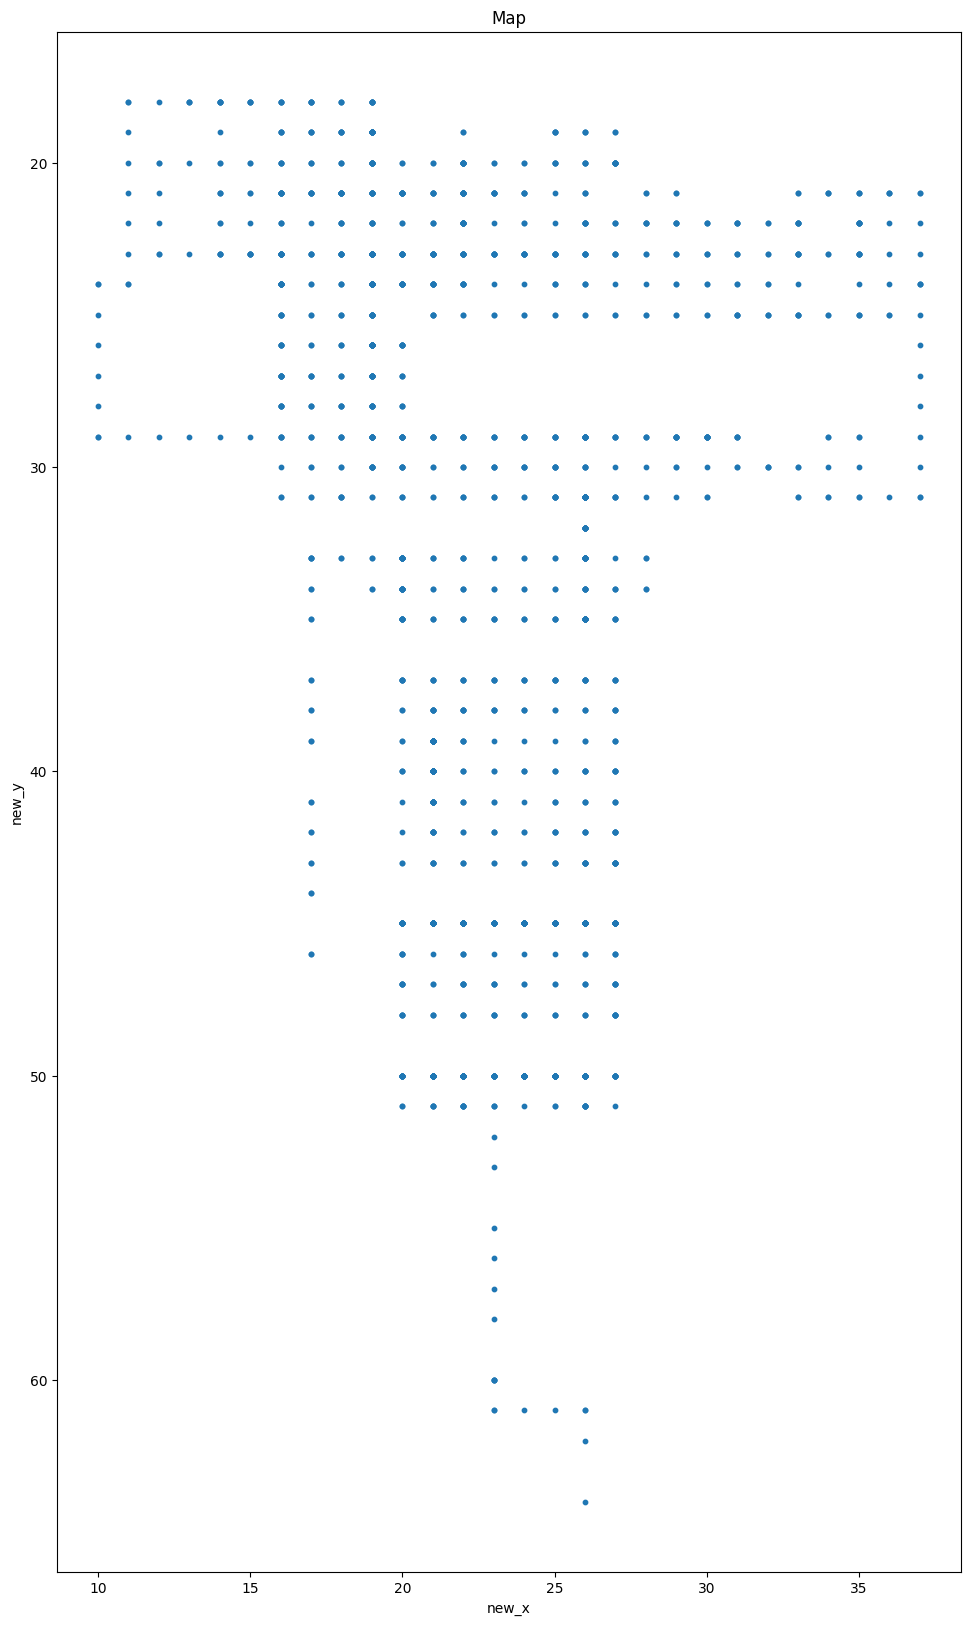

In [30]:
import matplotlib.pyplot as plt

# 创建图形对象和坐标轴
fig, ax = plt.subplots(figsize=(20, 20))  # 调整图形大小

# 绘制散点图，调整坐标点大小
ax.scatter(df['new_x'], df['new_y'], s=10)  # 调整坐标点大小

# 反转 y 轴
ax.invert_yaxis()

# 设置坐标轴标签
ax.set_xlabel('new_x')
ax.set_ylabel('new_y')

# 设置标题
ax.set_title('Map')

# 调整坐标轴比例相同
ax.set_aspect('equal')

# 显示图形
plt.show()


In [31]:
# 将坐标点四舍五入到最近的整数
df = df.round(0)
# 创建一个空的DataFrame，它的行和列分别代表y和x的值
grid_df = pd.DataFrame(index=np.arange(int(df['new_y'].min()), int(df['new_y'].max()) + 1),
                       columns=np.arange(int(df['new_x'].min()), int(df['new_x'].max()) + 1))

# 将存在的坐标点填充为1
for _, row in df.iterrows():
    grid_df.at[int(row['new_y']), int(row['new_x'])] = 1

# # 反转y轴
#grid_df = grid_df.iloc[::-1]

# 导出到Excel
grid_df.to_excel("Cerulean City coordinates.xlsx")

In [32]:
df=pd.read_excel("../asserts/coords_tracking/Cerulean City coordinates.xlsx", index_col=0)
# 先重置索引，这样行标签就变成一列
df = df.reset_index()
df

,index,10,11,12,13,14,15,16,17,18,...,28,29,30,31,32,33,34,35,36,37
0,18,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
4,22,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0
5,23,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,24,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0
7,25,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,26,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,27,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [33]:
# 使用 melt，这会把所有列都转成两列，一列是原来的列名（变量），一列是对应的值
df_melted = df.melt(id_vars='index', var_name='x_coords', value_name='mark')
df_melted

,index,x_coords,mark
0,18,10,NaN
1,19,10,NaN
2,20,10,NaN
3,21,10,NaN
4,22,10,NaN
...,...,...,...
1311,60,37,NaN
1312,61,37,NaN
1313,62,37,NaN
1314,63,37,NaN


In [34]:
# 修改列名
df_melted.rename(columns={'index': 'y_coords'}, inplace=True)
df_melted

,y_coords,x_coords,mark
0,18,10,NaN
1,19,10,NaN
2,20,10,NaN
3,21,10,NaN
4,22,10,NaN
...,...,...,...
1311,60,37,NaN
1312,61,37,NaN
1313,62,37,NaN
1314,63,37,NaN


In [35]:
# 过滤掉 mark 列为 NaN 的行
df_melted = df_melted.dropna(subset=['mark'])
df_melted

,y_coords,x_coords,mark
6,24,10,1.0
7,25,10,1.0
8,26,10,1.0
9,27,10,1.0
10,28,10,1.0
...,...,...,...
1278,27,37,1.0
1279,28,37,1.0
1280,29,37,1.0
1281,30,37,1.0


In [36]:
# 把值为PC_IN的单元格的值改成112
df_melted.loc[df_melted['mark'] == 'pc_in', 'mark'] = 112

df_melted.loc[df_melted['mark'] == 'farming', 'mark'] = 66
# 所有float类型的值转成int
df_melted = df_melted.astype({'mark': 'int'})

df_melted.reset_index(drop=True, inplace=True)

# 输出查看结果
print(df_melted)

     y_coords x_coords  mark
0          24       10     1
1          25       10     1
2          26       10     1
3          27       10     1
4          28       10     1
..        ...      ...   ...
419        27       37     1
420        28       37     1
421        29       37     1
422        30       37     1
423        31       37     1

[424 rows x 3 columns]


In [37]:
df_melted.to_csv('../asserts/coords_tracking/Cerulean_City_coordinates.csv')

In [ ]:
# 关闭游标和连接
cursor.close()
conn.close()